##Here we analyse our rice_yield dataset using KMeans clustering



In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from seaborn import set_style
from pandas.plotting import scatter_matrix
import os

set_style("whitegrid")

from sklearn.cluster import KMeans


In [351]:
rice_data = pd.read_csv('../Final_data/rice_yield.csv')

In [352]:

X = rice_data[['maxT_grow', 'maxT_harvest']].values

#the value k=5 is suggested by the scatter plot of (maxT_growth, maxT_harvest)
kmeans = KMeans()

kmeans.fit(X)

clusters = kmeans.predict(X)


In [353]:
kmeans.cluster_centers_

array([[31.83278976, 27.70431649],
       [21.93169231, 13.60532967],
       [33.72643478, 25.03826381],
       [32.67919015, 30.68192615],
       [26.82460584, 20.16359489],
       [15.26184314,  3.83444444],
       [34.39914724, 27.90717931],
       [28.56824738, 28.53618816]])

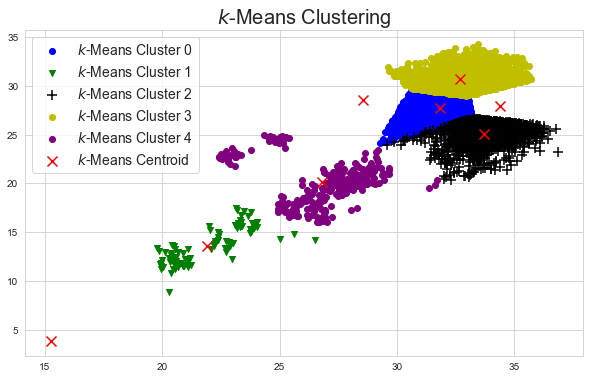

In [354]:
plt.figure(figsize=(10,6))

plt.scatter(X[clusters==0,0], X[clusters==0,1], c='b', label="$k$-Means Cluster 0")
plt.scatter(X[clusters==1,0], X[clusters==1,1], c='green', marker='v', label="$k$-Means Cluster 1")

plt.scatter(X[clusters==2,0], X[clusters==2,1], c='k', marker='+', s=100, label="$k$-Means Cluster 2")

plt.scatter(X[clusters==3,0], X[clusters==3,1], c='y',  label="$k$-Means Cluster 3")

plt.scatter(X[clusters==4,0], X[clusters==4,1], c='purple',  label="$k$-Means Cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], 
          kmeans.cluster_centers_[:,1], 
           c='r', marker='x', s=100, label='$k$-Means Centroid')

plt.legend(fontsize=14)
plt.title("$k$-Means Clustering", fontsize=20)

plt.show()

##### Updating rice_yield.csv 

by adding the columns "KM_clusterN_(maxT_growth_maxT_harvest)" that contains   the labels of the current clustering


In [355]:
rice_data = pd.DataFrame(rice_data)

rice_data["KM5_clusterN_(maxT_growth_maxT_harvest)"] = kmeans.labels_



In [356]:
rice_data = pd.DataFrame(rice_data)

rice_data["KM5_clusterN_(maxT_growth_maxT_harvest)"] = kmeans.labels_



rice_data.to_csv('../Final_data/rice_yield_KMeans.csv')

## Justification that k=5 is a reasonable choice demonstrated by the elbow method

In [357]:
inertias = []

for k in range(1,11):
    kmeans = KMeans(k)
    kmeans.fit(X)
    
   
    inertias.append(kmeans.inertia_)

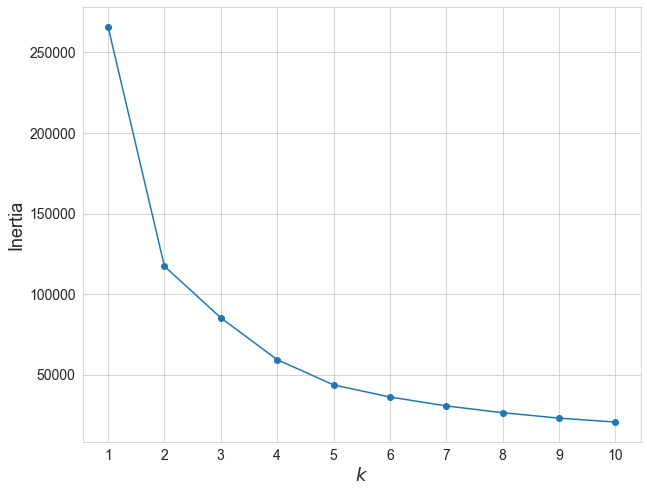

In [358]:
plt.figure(figsize=(10,8))

plt.plot(range(1,11), inertias, '-o')

plt.xlabel("$k$", fontsize=18)
plt.ylabel("Inertia", fontsize=18)

plt.xticks(range(1,11),fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## Auxiliary data frame
We work with the weather related parameters: 

`prec_grow` <br>
 `prec_harvest`<br>
 `et_grow`<br>
 `et_harvest`<br>
 `maxT_grow`<br>
 `maxT_harvest`<br>
 `minT_grow`<br>
 `minT_harvest`<br>
 `windspeed_grow`<br>
 `windspeed_harvest`<br> 
 `runoff_grow`<br>
 `runoff_harvest`<br>
 
We create an auxiliary data frame, called _Averages_, that contains averages with respect to year of the values of the above mentioned parameters
for each district

In [360]:
 # this is just a pandas series with the district numbers 
#in the same order as in the main data frame
Averages = rice_data[["Dist Name"]].drop_duplicates()

params = ["prec_grow",
                    "prec_harvest",
                    "et_grow",
                    "et_harvest",
                    "maxT_grow",
                    "maxT_harvest",
                    "minT_grow",
                    "minT_harvest",
                    "windspeed_grow",
                    "windspeed_harvest",

                    'runoff_grow', 
                    'runoff_harvest']  # The same set of parameters as in the hierarchical clusterization




#adding the mean values to the data frame averages
Districts = Averages["Dist Name"].values

for p in params:
    new_column = []
    for district in Districts:
        aux = rice_data[rice_data["Dist Name"] == district]
        p_mean = aux[p].mean()
        new_column.append(p_mean)
    # here we add a column named p_av to the Averages 
    #with mean values of corresponding parameter p w.r.t. year per district
    Averages[p+"_av"] = new_column
#Averages.to_csv('../Final_data/rice_yield_kmeans_Averaged_per_year.csv')

# The KMean clustering model with respect to the following data:
 
 `prec_grow` <br>
 `prec_harvest`<br>
 `et_grow`<br>
 `et_harvest`<br>
 `maxT_grow`<br>
 `maxT_harvest`<br>
 `minT_grow`<br>
 `minT_harvest`<br>
 `windspeed_grow`<br>
 `windspeed_harvest`<br> 
 `runoff_grow`<br>
 `runoff_harvest`<br>

In [335]:

Y = Averages.copy().drop("Dist Name", axis=1).values
#the value k=5 is suggested by the scatter plot of (maxT_growth, maxT_harvest)
Kmeans = KMeans(5)

Kmeans.fit(Y)

clusters = Kmeans.predict(Y)



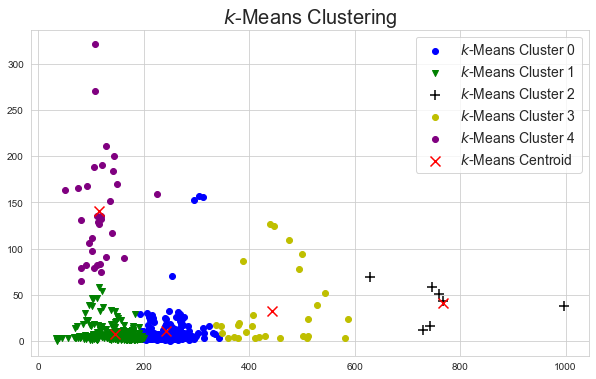

In [336]:
plt.figure(figsize=(10,6))

plt.scatter(Y[clusters==0,0], Y[clusters==0,1], c='b', label="$k$-Means Cluster 0")
plt.scatter(Y[clusters==1,0], Y[clusters==1,1], c='green', marker='v', label="$k$-Means Cluster 1")

plt.scatter(Y[clusters==2,0], Y[clusters==2,1], c='k', marker='+', s=100, label="$k$-Means Cluster 2")

plt.scatter(Y[clusters==3,0], Y[clusters==3,1], c='y',  label="$k$-Means Cluster 3")

plt.scatter(Y[clusters==4,0], Y[clusters==4,1], c='purple',  label="$k$-Means Cluster 4")

plt.scatter(Kmeans.cluster_centers_[:,0], 
          Kmeans.cluster_centers_[:,1], 
           c='r', marker='x', s=100, label='$k$-Means Centroid')

plt.legend(fontsize=14)
plt.title("$k$-Means Clustering", fontsize=20)

plt.show()

In [337]:
Averages

,Dist Name,prec_grow_av,prec_harvest_av,et_grow_av,et_harvest_av,maxT_grow_av,maxT_harvest_av,minT_grow_av,minT_harvest_av,windspeed_grow_av,windspeed_harvest_av,runoff_grow_av,runoff_harvest_av
0,Durg,239.606308,2.758269,113.753538,45.457885,32.092308,28.857115,24.135769,14.754231,1.658254,0.699288,91.185846,0.135000
26,Bastar,267.674000,11.752500,113.223692,53.210000,29.513385,27.717500,21.951231,13.415577,1.755331,0.849962,121.965077,0.584038
52,Raipur,249.854385,2.984231,114.010308,46.131538,32.234923,28.744423,24.147462,15.015577,1.596808,0.690654,98.108308,0.145577
78,Raigarh,501.737462,6.049615,112.258077,53.816538,30.965000,29.532885,24.012077,16.800192,2.009954,1.032365,350.905000,0.498846
104,Surguja,247.989692,2.615577,103.144231,40.811346,30.237308,25.516346,22.258615,11.313462,1.320969,0.671192,111.461923,0.125962
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10460,Gariaband,286.667000,1.783750,111.825000,47.230000,30.977000,28.341250,23.428500,14.285000,1.502000,0.586875,128.783000,0.087500
10464,Kondagaon,294.482500,2.542500,109.925000,48.525000,29.353000,27.712500,21.933000,12.991250,1.611600,0.657625,138.047500,0.123750
10468,Mungli,248.966000,0.835000,107.689000,42.783750,31.781000,27.752500,23.824000,13.587500,1.189100,0.498500,98.139500,0.036250
10472,Sukma,291.298000,5.528750,122.334000,54.576250,31.732500,28.802500,24.185000,16.280000,1.682200,0.811625,120.874000,0.268750


In [338]:
inertias = []

for k in range(1,15):
    Km = KMeans(k)
    Km.fit(Y)
    
   
    inertias.append(Km.inertia_)

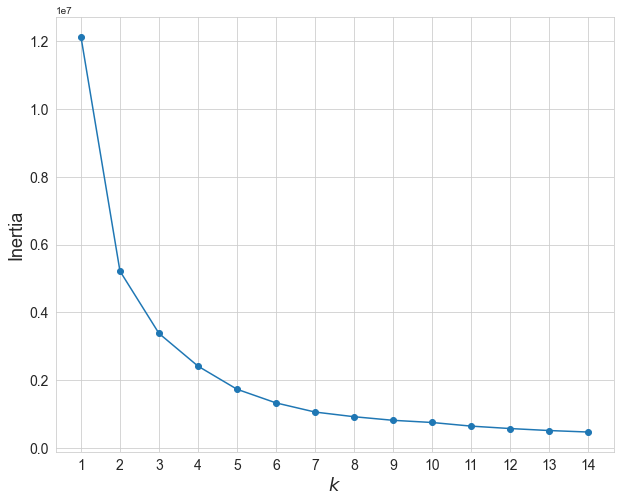

In [339]:
plt.figure(figsize=(10,8))

plt.plot(range(1,15), inertias, '-o')

plt.xlabel("$k$", fontsize=18)
plt.ylabel("Inertia", fontsize=18)

plt.xticks(range(1,15),fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# Creating a new dataframe that contains the columns of rice_yields.csv except the column Year and, in addition, has the column Climate_cluster

In [340]:
rice_data = pd.DataFrame(Averages)

rice_data["KM5_clusterN_(maxT_growth_maxT_harvest)"] = Kmeans.labels_



rice_data.to_csv('../Final_data/rice_yield_KMeans_averaged.csv')


# The map of India based on the KMeans clustering 

In [341]:
import geopandas as gpd

In [342]:


# Read in shape file.
shp = gpd.read_file('../Final_data/districts2020.shp')


In [343]:
df = pd.read_csv('../Final_data/rice_yield_KMeans_averaged.csv')

In [344]:
# Set up a "cluster" column of NaNs.
shp['cluster'] = np.zeros(len(shp),dtype=int)*np.NaN

In [345]:
for i in range(len(df)):
    shp.loc[shp['distname']==df.iloc[i]['Dist Name'], 'KM5_clusterN_(maxT_growth_maxT_harvest)'] = int(df.iloc[i]['KM5_clusterN_(maxT_growth_maxT_harvest)'])

In [346]:
shp.sample(5, random_state=4000)

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry,cluster,KM5_clusterN_(maxT_growth_maxT_harvest)
152,103,23,Madhya Pradesh,STATE,434,Ratlam,4861.0,1455069.0,296683.0,738241.0,716828.0,5.804216e+09,581747.844983,"POLYGON ((74.59782 23.42723, 74.59818 23.42747...",NaN,1.0
443,647,33,Tamil Nadu,STATE,632,Coimbatore,4732.0,3458045.0,958035.0,1729297.0,1728748.0,4.897219e+09,514045.680355,"POLYGON ((76.85141 10.84584, 76.85064 10.84696...",NaN,4.0
64,54,01,Jammu & Kashmir,STATE,017,Ramban,1329.0,283713.0,55490.0,149132.0,134581.0,1.465391e+09,208471.413469,"POLYGON ((75.36832 33.10038, 75.36891 33.09905...",NaN,NaN
334,358,27,Maharashtra,STATE,520,Raigarh,7152.0,2634200.0,611790.0,1344345.0,1289855.0,7.788800e+09,730771.806596,"MULTIPOLYGON (((73.47458 19.13519, 73.47731 19...",NaN,3.0
80,606,09,Uttar Pradesh,STATE,164,Kanpur Nagar,3155.0,4581268.0,863338.0,2459806.0,2121462.0,3.628023e+09,464145.457855,"POLYGON ((79.95192 26.92077, 79.95171 26.92133...",NaN,1.0


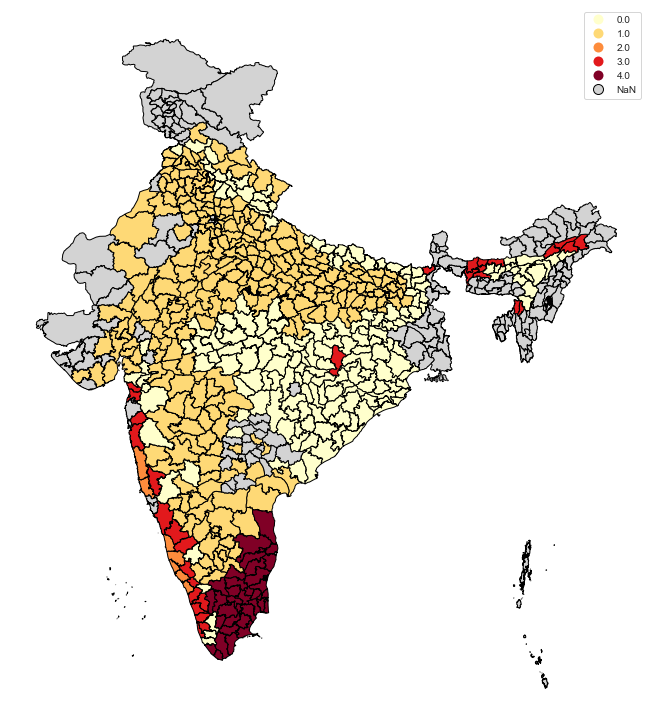

In [347]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), constrained_layout=True)
# Show full map including NaNs.
shp.plot(ax=ax, column='KM5_clusterN_(maxT_growth_maxT_harvest)', edgecolor='black', cmap='YlOrRd', legend=True, categorical=True,
        missing_kwds={'color': 'lightgrey'})
       
noNaNs = shp.dropna().copy()
noNaNs.cluster = noNaNs['KM5_clusterN_(maxT_growth_maxT_harvest)'].astype(int)
legend_kwds =  dict(loc='upper right', fontsize=14) 
#noNaNs.plot(ax=ax, column='KM5_clusterN_(maxT_growth_maxT_harvest)', edgecolor='black', 
 #          cmap='YlOrRd', legend=True, categorical=True,
 #                 legend_kwds=legend_kwds)

# Hide axes.
ax.set_axis_off()
plt.show()